In [69]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
city_data.head(25)
# len(city_data) -- 120 city information

ride_data = pd.read_csv(ride_data_to_load)
ride_data.head()
#len(ride_data) -- 2375 records of ride data


,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [70]:
# Combine the data into a single dataset
city_ride_data = pd.merge(city_data,ride_data,how="left",on=["city","city"])

# Display the data table for preview
city_ride_data.head()
#len(city_ride_data) --2375 records
#city_ride_data.dtypes

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [71]:
#x_group=city_ride_data[['city','type','fare','ride_id']]
x_group = city_ride_data.groupby(['city','type'])

avg_fare_summary = x_group["fare"].mean()
tot_num_rides = x_group["ride_id"].count()


# Create data frame
city_ride_summary = pd.DataFrame({"avg_fare":avg_fare_summary,
                            "tot_rides":tot_num_rides}
                                 )

city_ride_summary['driver_count'] = city_data.groupby(['city','type'])['driver_count'].max()

#school_summary['Avg_Math_Score'] = school_data_complete.groupby(['school_name','type'])['math_score'].mean()

city_ride_summary.head()

,,avg_fare,tot_rides,driver_count
city,type,,,
Amandaburgh,Urban,24.641667,18,12
Barajasview,Urban,25.332273,22,26
Barronchester,Suburban,36.422500,16,11
Bethanyland,Suburban,32.956111,18,22
Bradshawfurt,Rural,40.064000,10,7


## Bubble Plot of Ride Sharing Data

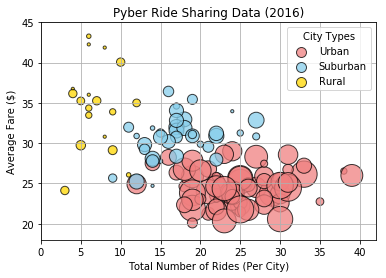

In [72]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure

#city_ride_summary.plot(kind='scatter', x='tot_rides', y='avg_fare', s='driver_count')
#labels = city_ride_summary['type']
city_ride_summary.reset_index(inplace=True)

driver_count = {'Urban': 'lightcoral', 'Suburban': 'skyblue', 'Rural': 'gold'}
for key, value in driver_count.items():
    #print(f'Key1 {key} and Value1 {value}')
    
    colors=value
    
    plt.scatter(x=city_ride_summary.loc[city_ride_summary['type'] == key,['tot_rides']], 
                y=city_ride_summary.loc[city_ride_summary['type'] == key,['avg_fare']], 
                s=(city_ride_summary.loc[city_ride_summary['type'] == key,['driver_count']]*10),
                marker='o',
                c=colors,
                label=key,
                alpha=0.75, linewidth=1,
                edgecolor="black")

#incorporate the other graph properties
plt.grid()

#set lower & upper limits for X-Axis
plt.xlim(0, 42)

#set lower & upper limits for Y-Axis
plt.ylim(18, 45)

#create a legend
legend = plt.legend(title="City Types",loc='best')

legend.legendHandles[0]._sizes = [100]
legend.legendHandles[1]._sizes = [100]
legend.legendHandles[2]._sizes = [100]

#create labels for the scatter plot
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

#save figure
plt.savefig("./Images/pyber_bubble_plot.png")

#city_ride_summary.iplot(kind='bubble', x='tot_rides', y='avg_fare', size='pop', text='country',
#             xTitle='Total Number of Rides (Per City)', yTitle='Average Fare ($)')

## Total Fares by City Type

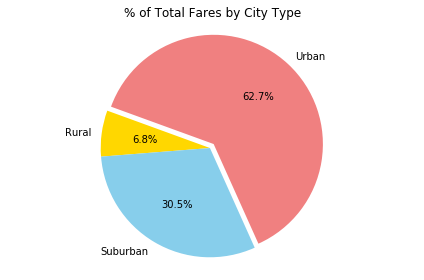

In [73]:
# Calculate Type Percents

x_group = city_ride_data.groupby(['type'])

tot_fare = city_ride_data['fare'].sum()
reg_fare = x_group['fare'].sum()
pct_fare = reg_fare/tot_fare
types = city_ride_data['type']


# Create data frame
city_type_summary = pd.DataFrame({'regular_fare': reg_fare}
                                 )
city_type_summary['pct_tot_fare'] = city_type_summary['regular_fare']/tot_fare * 100

city_type_summary.reset_index(inplace=True)

# Create a pie chart
colors=["gold","skyblue","lightcoral"]
plt.pie(
    # using data total)arrests
    city_type_summary['pct_tot_fare'],
    # with the labels being officer names
    labels=city_type_summary['type'],
    # with no shadows
    shadow=False,
    # with colors
    colors=colors,
    # with one slide exploded out
    explode=(0, 0, 0.05),
    # with the start angle at 90%
    startangle=160,
    # with the percent listed as a fraction
    autopct='%1.1f%%'
    )

# View the plot drop above
plt.axis('equal')

#plt.title("% of Total Fares by City Type")
plt.title("% of Total Fares by City Type")

# View the plot
plt.tight_layout()
#plt.show()

# Build Pie Chart

#city_type_summary.plot(kind='pie',y='pct_tot_fare')

#autopct='%1.1f%%',Title="Test Tile",startangle=90, shadow=False, labels=city_type_summary['type'], legend = False)


#save figure
plt.savefig("./Images/pyber_fares_by_city_type.png")


## Total Rides by City Type

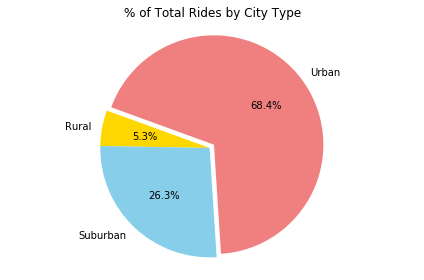

In [74]:
# Calculate Ride Percents

#city_type_summary.reset_index(inplace=True)

city_type_summary = city_type_summary.set_index('type')
x_group = city_ride_data.groupby(['type'])

tot_rides = city_ride_data['ride_id'].count()
reg_rides = x_group['ride_id'].count()
pct_rides = reg_rides/tot_rides

# Append values in data frame

city_type_summary['regular_rides'] = city_ride_data.groupby(['type'])['ride_id'].count()
city_type_summary['pct_tot_rides'] = city_type_summary['regular_rides']/tot_rides * 100

city_type_summary.reset_index(inplace=True)
city_type_summary.head()

# Build Pie Chart
colors=["gold","skyblue","lightcoral"]
plt.pie(
    # using data total)arrests
    city_type_summary['pct_tot_rides'],
    # with the labels being officer names
    labels=city_type_summary['type'],
    # with no shadows
    shadow=False,
    # with colors
    colors=colors,
    # with one slide exploded out
    explode=(0, 0, 0.05),
    # with the start angle at 90%
    startangle=160,
    # with the percent listed as a fraction
    autopct='%1.1f%%'
    )

# View the plot drop above
plt.axis('equal')

#plt.title("% of Total Fares by City Type")
plt.title("% of Total Rides by City Type")

# View the plot
plt.tight_layout()
#plt.show()


# Save Figure

plt.savefig("./Images/pyber_rides_by_city_type.png")


## Total Drivers by City Type

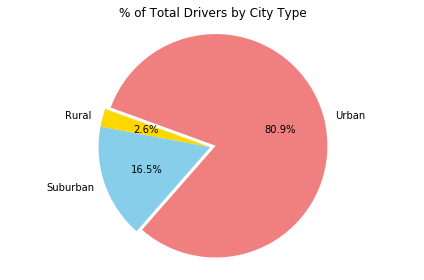

In [75]:
# Calculate Driver Percents

city_type_summary = city_type_summary.set_index('type')

x_group = city_data.groupby(['type'])

tot_drivers = city_data['driver_count'].sum()
reg_drivers = x_group['driver_count'].sum()
pct_drivers = reg_drivers/tot_drivers

# Append values in data frame

#city_type_summary['regular_drivers'] = city_data.groupby(['type'])['driver_count'].count()
city_type_summary['regular_drivers'] = reg_drivers
city_type_summary['pct_tot_drivers'] = city_type_summary['regular_drivers']/tot_drivers * 100

city_type_summary.reset_index(inplace=True)
city_type_summary.head()
# Build Pie Charts

colors=["gold","skyblue","lightcoral"]
plt.pie(
    # using data total)arrests
    city_type_summary['pct_tot_drivers'],
    # with the labels being officer names
    labels=city_type_summary['type'],
    # with no shadows
    shadow=False,
    # with colors
    colors=colors,
    # with one slide exploded out
    explode=(0, 0, 0.05),
    # with the start angle at 90%
    startangle=160,
    # with the percent listed as a fraction
    autopct='%1.1f%%'
    )

# View the plot drop above
plt.axis('equal')

#plt.title("% of Total Fares by City Type")
plt.title("% of Total Drivers by City Type")

# View the plot
plt.tight_layout()
#plt.show()


# Save Figure

plt.savefig("./Images/pyber_drivers_by_city_type.png")




In [76]:
# Show Figure
plt.show()

## THE END !!!